<a href="https://colab.research.google.com/github/Sahilshajahan/spatial_data_analysis/blob/main/ordinary_kriging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pykrige

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 869 kB 40.1 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
import geopandas as gpd

In [ ]:
data=gpd.read_file(r"D:\Desktop\.Files\Temp\Temp_43N.shp")

In [ ]:
data

,Id,Temp_DC,geometry
0,1,32.20,POINT (687133.984 968795.752)
1,2,32.22,POINT (690207.021 969533.523)
2,3,32.34,POINT (693417.980 968758.858)
3,4,32.78,POINT (696605.298 972984.960)
4,5,32.96,POINT (699076.821 976220.983)
...,...,...,...
76,83,35.23,POINT (724719.386 952795.954)
77,85,30.53,POINT (722984.682 940287.824)
78,86,30.85,POINT (721523.878 942296.429)
79,86,32.54,POINT (730288.700 947044.040)


In [ ]:
x=data.geometry.x
y=data.geometry.y

In [ ]:
x

0     687133.983726
1     690207.021264
2     693417.979807
3     696605.298323
4     699076.820576
          ...      
76    724719.386286
77    722984.682033
78    721523.878452
79    730288.699941
80    736040.614044
Length: 81, dtype: float64

In [ ]:
y

0     968795.752255
1     969533.523005
2     968758.858469
3     972984.959925
4     976220.983306
          ...      
76    952795.954443
77    940287.823775
78    942296.428700
79    947044.040340
80    941292.126237
Length: 81, dtype: float64

In [ ]:
z=data.Temp_DC
z

0     32.20
1     32.22
2     32.34
3     32.78
4     32.96
      ...  
76    35.23
77    30.53
78    30.85
79    32.54
80    37.95
Name: Temp_DC, Length: 81, dtype: float64

<AxesSubplot:>

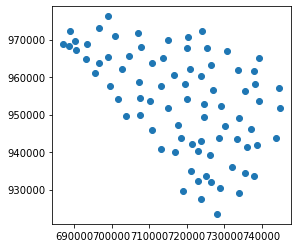

In [ ]:
data.plot()

Text(0.5, 1.0, '')

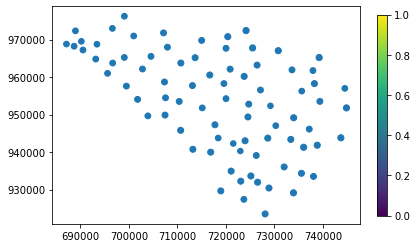

In [ ]:
cax = plt.scatter(x,y,z)
cbar = plt.colorbar(cax, fraction=0.03)
plt.title('')

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame(x,columns=['long']) 
df

,long
0,687133.983726
1,690207.021264
2,693417.979807
3,696605.298323
4,699076.820576
...,...
76,724719.386286
77,722984.682033
78,721523.878452
79,730288.699941


In [ ]:
df['lat']=y
df

,long,lat
0,687133.983726,968795.752255
1,690207.021264,969533.523005
2,693417.979807,968758.858469
3,696605.298323,972984.959925
4,699076.820576,976220.983306
...,...,...
76,724719.386286,952795.954443
77,722984.682033,940287.823775
78,721523.878452,942296.428700
79,730288.699941,947044.040340


In [ ]:
df["Temp_DC"]=z
df

,long,lat,Temp_DC
0,687133.983726,968795.752255,32.20
1,690207.021264,969533.523005,32.22
2,693417.979807,968758.858469,32.34
3,696605.298323,972984.959925,32.78
4,699076.820576,976220.983306,32.96
...,...,...,...
76,724719.386286,952795.954443,35.23
77,722984.682033,940287.823775,30.53
78,721523.878452,942296.428700,30.85
79,730288.699941,947044.040340,32.54


Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'exponential' Variogram Model
Partial Sill: 3.7312818045557217
Full Sill: 4.642916824424536
Range: 56341.78451446078
Nugget: 0.9116350198688148 



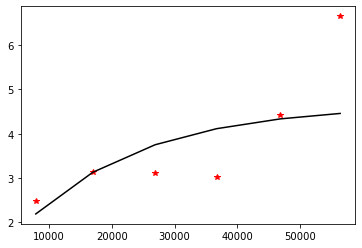

Calculating statistics on variogram model fit...


In [ ]:
OK = OrdinaryKriging(x,y,z,variogram_model='exponential',
                    verbose=True,enable_plotting=True)

In [ ]:
#determine xmin,xmax,ymin,ymax from our dataset
xv=df['long'].values
yv=df['lat'].values

xmin,xmax=min(xv),max(xv)
ymin,ymax=min(yv),max(yv)

gridx=np.arange(xmin,xmax,30,dtype='float64')
gridy=np.arange(ymin,ymax,30,dtype='float64')

# we build the grid
xx,yy = OK.execute("grid",gridx,gridy)

Executing Ordinary Kriging...



In [ ]:
gridy.shape

(1757,)

In [ ]:
print(xx.shape)
print(yy.shape)

(1757, 1925)
(1757, 1925)


Text(0.5, 1.0, 'porosity estimate')

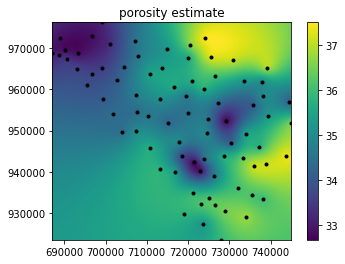

In [ ]:
cax = plt.imshow(xx, extent=(xmin,xmax,ymin,ymax),origin="lower")
plt.scatter(x,y,c='k',marker='.')
cbar=plt.colorbar(cax)
plt.title("porosity estimate")

Text(0.5, 1.0, 'porosity standard devarion ')

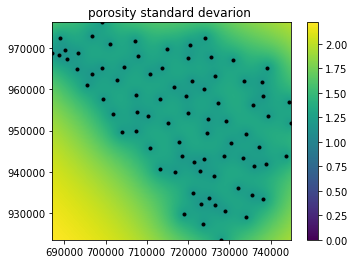

In [ ]:
cax = plt.imshow(np.sqrt(yy),extent=(xmin,xmax,ymin,ymax),origin="lower",vmin = 0)
plt.scatter(x,y,c='k',marker='.')
cbar=plt.colorbar(cax)
plt.title("porosity standard devarion ")

In [ ]:
OK.variogram_model_parameters

array([3.73128180e+00, 5.63417845e+04, 9.11635020e-01])